In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
data = pd.read_csv("./input/BreadBasket_DMS.csv")

In [2]:
data.describe(include = 'all')

,Date,Time,Transaction,Item
count,21293,21293,21293.000000,21293
unique,159,8240,NaN,95
top,2017-02-04,12:07:39,NaN,Coffee
freq,302,16,NaN,5471
mean,NaN,NaN,4951.990889,NaN
std,NaN,NaN,2787.758400,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2548.000000,NaN
50%,NaN,NaN,5067.000000,NaN
75%,NaN,NaN,7329.000000,NaN


In [3]:
data.isnull().any()

Date           False
Time           False
Transaction    False
Item           False
dtype: bool

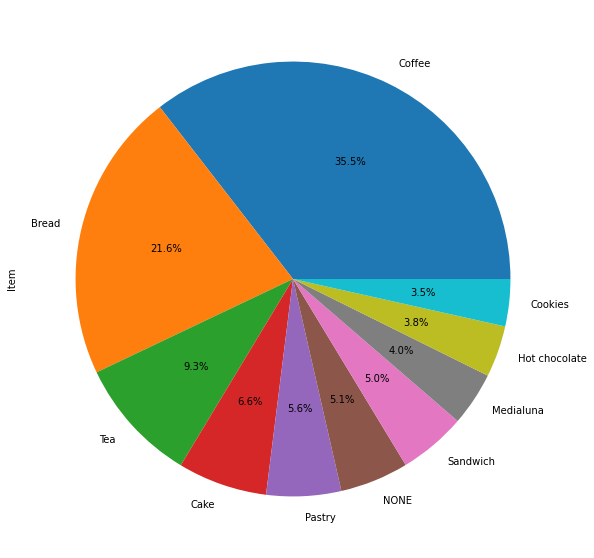

In [4]:
plt.figure(1, figsize = (10,10))
data['Item'].value_counts().head(10).plot.pie(autopct = "%1.1f%%")
plt.show()

In [5]:
data["Item"].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Chicken sand         1
The BART             1
Adjustment           1
Olum & polenta       1
Bacon                1
Name: Item, Length: 95, dtype: int64

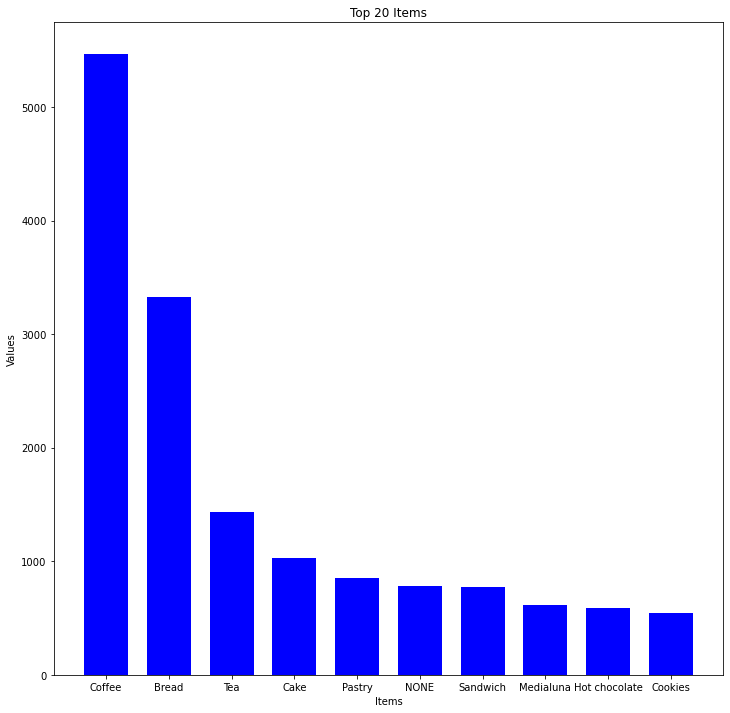

In [6]:
itemNames = data["Item"].value_counts().index
itemValues = data["Item"].value_counts().values

plt.figure(figsize = (12,12))
plt.ylabel("Values", fontsize = 'medium') 
plt.xlabel("Items", fontsize = 'medium') 
plt.title("Top 20 Items")
plt.bar(itemNames[:10], itemValues[:10], width = 0.7, color = 'blue', linewidth = 0.4)

plt.show()

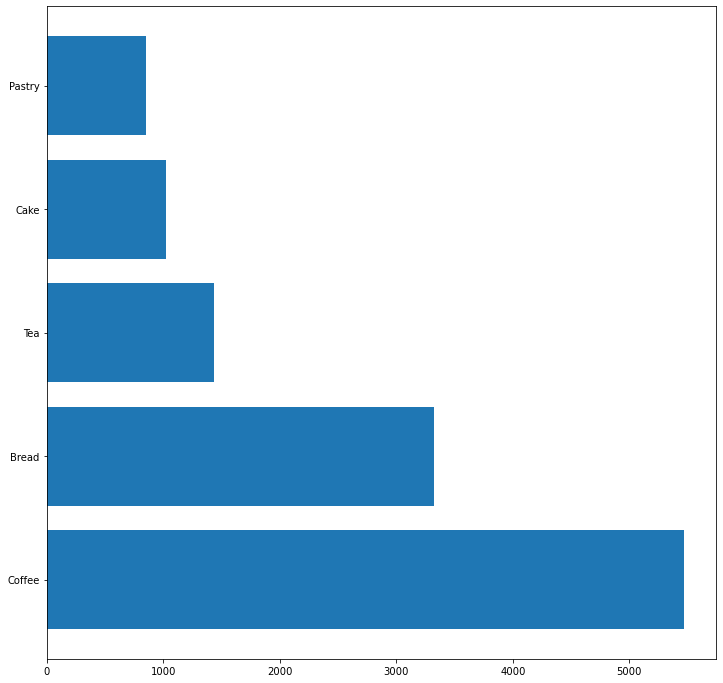

In [7]:
fig, ax = plt.subplots(figsize = (12,12)) 

plt.style.use('fivethirtyeight')
ax.barh(itemNames[:5], itemValues[:5])

plt.show()

In [8]:
firstMorning = data.loc[(data['Time'] >= '06:00:00' ) & (data['Time'] < '09:00:00')] 
secondMorning = data.loc[(data['Time']>='09:00:00')&(data['Time']<'12:00:00')]
firstAfternoon = data.loc[(data['Time']>='12:00:00')&(data['Time']<'15:00:00')]
secondAfternoon = data.loc[(data['Time']>='15:00:00')&(data['Time']<'18:00:00')]
night = data.loc[(data['Time']>='18:00:00')&(data['Time']<'21:00:00')]
hourlySales = {'firstMorning': len(firstMorning), 'secondMorning': len(secondMorning), 'firstAfternoon': len(firstAfternoon),'secondAfternoon': len(secondAfternoon),'night': len(night)}
print("This is night sales: ", hourlySales['night'])

This is night sales:  152


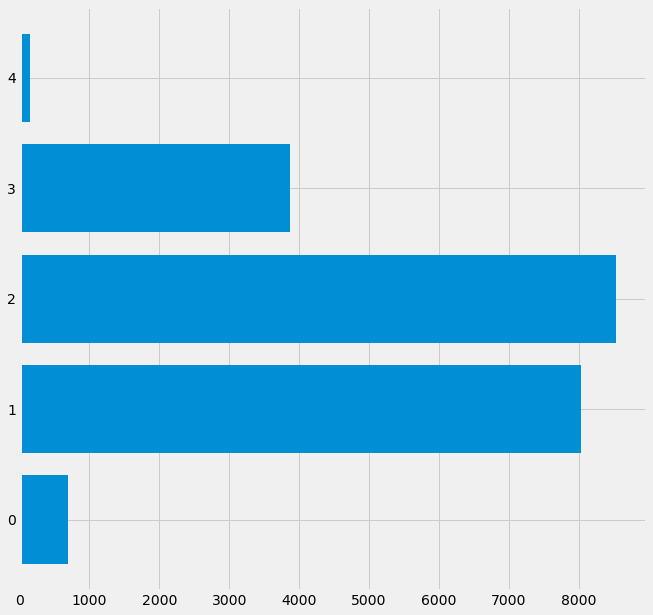

In [9]:
fig ,ax = plt.subplots(figsize = (10,10))
ax.barh(range(len(hourlySales)), list(hourlySales.values()), align = 'center')

plt.show()

In [10]:
print(firstMorning['Item'].value_counts().head(15))

Coffee           212
Bread            173
Pastry            59
Medialuna         49
NONE              25
Toast             24
Tea               21
Farm House        13
Cookies           12
Hot chocolate      9
Cake               8
Baguette           8
Jam                7
Scandinavian       6
Scone              6
Name: Item, dtype: int64


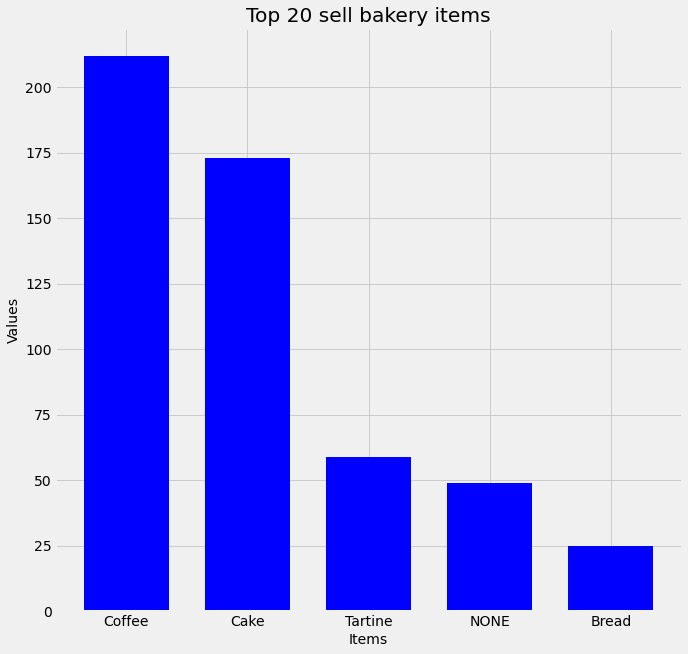

In [11]:
plt.figure(figsize= (10,10))
plt.ylabel('Values', fontsize = 'medium')
plt.xlabel('Items', fontsize = 'medium')
plt.title('Top 20 sell bakery items')
plt.bar(firstMorning['Item'][:5],firstMorning['Item'].value_counts()[:5], width = 0.7, color="blue",linewidth=0.4)

plt.show()


In [12]:
data['datetime'] = pd.to_datetime(data['Date'] + ' '+data['Time'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['weekday'] = data['datetime'].dt.weekday
data['hour'] = data['datetime'].dt.hour
data = data.drop(['Date'], axis=1)


In [13]:
data.head()

,Time,Transaction,Item,datetime,year,month,day,weekday,hour
0,09:58:11,1,Bread,2016-10-30 09:58:11,2016,10,30,6,9
1,10:05:34,2,Scandinavian,2016-10-30 10:05:34,2016,10,30,6,10
2,10:05:34,2,Scandinavian,2016-10-30 10:05:34,2016,10,30,6,10
3,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,2016,10,30,6,10
4,10:07:57,3,Jam,2016-10-30 10:07:57,2016,10,30,6,10


2017    12732
2016     8561
Name: year, dtype: int64

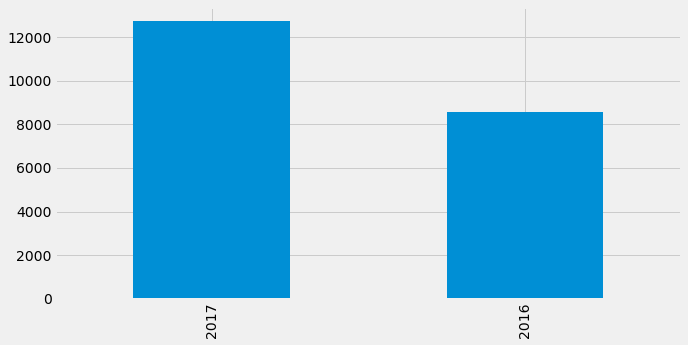

In [14]:
yearlyTable = data['year'].value_counts().plot(kind = 'bar' , figsize = (10, 5)) 

yearlyTable.set_xlabel('')
data['year'].value_counts().head()

,Transaction
monthlyTransaction,
2016-10,385
2016-11,4607
2016-12,3569
2017-01,3509
2017-02,3991
2017-03,4041
2017-04,1191


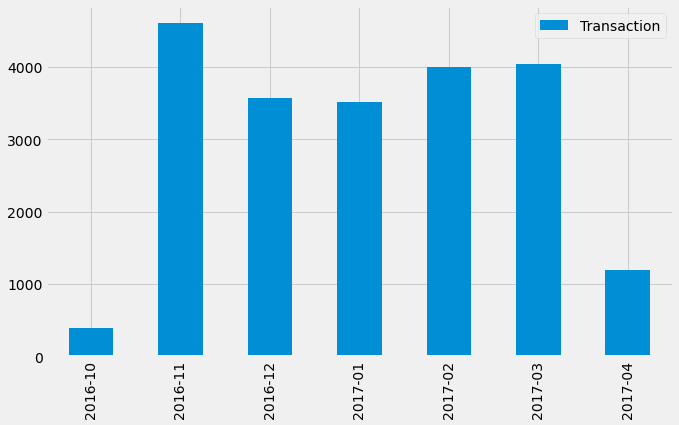

In [15]:
data['monthlyTransaction'] = pd.to_datetime(data['datetime']).dt.to_period('M')
monthlyTransaction = data[['monthlyTransaction','Transaction']].groupby(['monthlyTransaction'], as_index=False).count().sort_values(by='monthlyTransaction')
monthlyTransaction.set_index('monthlyTransaction' ,inplace=True)

monthlyTable = monthlyTransaction.plot(kind='bar',figsize=(10,6))
monthlyTable.set_xlabel("")

monthlyTransaction

,Transaction
hour,
1,1
7,25
8,669
9,2045
10,2763
11,3216
12,3021
13,2776
14,2736


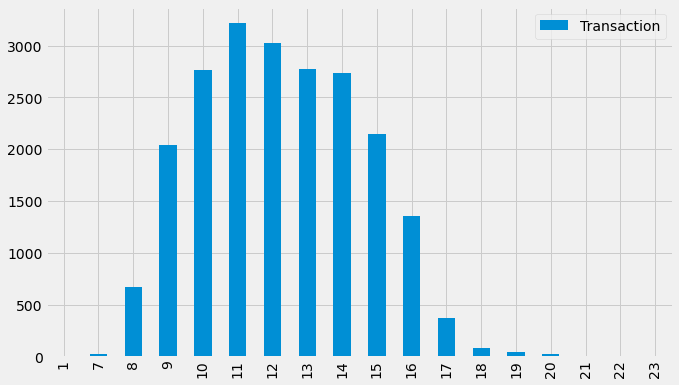

In [16]:
hourlyTransaction = data[['hour','Transaction']].groupby(['hour'], as_index=False).count()
hourlyTransaction.head(10)
hourlyTransaction.set_index('hour' ,inplace=True)

tableSort = hourlyTransaction.plot(kind='bar',figsize=(10,6))
tableSort.set_xlabel("")

hourlyTransaction